# Proyek Analisis Data: Air Quality Dataset
- **Andre Jackryan Natanaen Sitorus:**
- **andresitorus202@gmail.com:**
- **natanaen:**

## Menentukan Pertanyaan Bisnis

- Kota mana yang memiliki tingkat polusi (PM2.5 dan PM10) tertinggi dan terendah secara konsisten dalam 5 tahun terakhir?
- Bagaimana perbedaan pola polusi udara (musiman atau harian) di antara kota-kota tersebut?
- Apakah pola hubungan antara faktor cuaca (suhu, tekanan udara, hujan, dll.) dan tingkat polusi serupa di semua kota?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Daftar URL dataset yang ada di GitHub
urls = [
    "https://raw.githubusercontent.com/natan-Coba/tugas-dicoding/refs/heads/master/data/PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "https://raw.githubusercontent.com/natan-Coba/tugas-dicoding/refs/heads/master/data/PRSA_Data_Changping_20130301-20170228.csv",
    "https://raw.githubusercontent.com/natan-Coba/tugas-dicoding/refs/heads/master/data/PRSA_Data_Dingling_20130301-20170228.csv",
    "https://raw.githubusercontent.com/natan-Coba/tugas-dicoding/refs/heads/master/data/PRSA_Data_Dongsi_20130301-20170228.csv",
    "https://raw.githubusercontent.com/natan-Coba/tugas-dicoding/refs/heads/master/data/PRSA_Data_Guanyuan_20130301-20170228.csv",
    "https://raw.githubusercontent.com/natan-Coba/tugas-dicoding/refs/heads/master/data/PRSA_Data_Gucheng_20130301-20170228.csv",
    "https://raw.githubusercontent.com/natan-Coba/tugas-dicoding/refs/heads/master/data/PRSA_Data_Huairou_20130301-20170228.csv",
    "https://raw.githubusercontent.com/natan-Coba/tugas-dicoding/refs/heads/master/data/PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "https://raw.githubusercontent.com/natan-Coba/tugas-dicoding/refs/heads/master/data/PRSA_Data_Shunyi_20130301-20170228.csv",
    "https://raw.githubusercontent.com/natan-Coba/tugas-dicoding/refs/heads/master/data/PRSA_Data_Tiantan_20130301-20170228.csv",
    "https://raw.githubusercontent.com/natan-Coba/tugas-dicoding/refs/heads/master/data/PRSA_Data_Wanliu_20130301-20170228.csv",
    "https://raw.githubusercontent.com/natan-Coba/tugas-dicoding/refs/heads/master/data/PRSA_Data_Wanshouxigong_20130301-20170228.csv"
]

# Membaca dan menyimpan dataset dalam dictionary dengan nama file sebagai key
dataset_dict = {url.split('/')[-1]: pd.read_csv(url) for url in urls}



In [3]:
# Menampilkan beberapa dataset pertama dari dictionary
for filename, data in dataset_dict.items():
    print(f"Dataset {filename}:")
    print(data.head(), "\n")

Dataset PRSA_Data_Aotizhongxin_20130301-20170228.csv:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin   

Dataset PRSA_Data_Changping_20130301-20170228.csv:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300

**Insight:**
- Dataset tentang air Quality sebelumnya di push/upload ke dalam Github dan kita panggil menggunakan pandas, dan kita beri variabel masing masing file .CSV mewakili nama masing masing kota
- Seluruh data set ber format ".csv" ada 12 file CSV yang mewakili masing masing daerah/kota

### Assessing Data

In [4]:
# Menampilkan informasi untuk setiap dataset
for filename, data in dataset_dict.items():
    print(f"Informasi untuk {filename}:")
    print(data.info(), "\n")

Informasi untuk PRSA_Data_Aotizhongxin_20130301-20170228.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None 


In [5]:
#Melihat deskripsi dataset
for filename, data in dataset_dict.items():
    print(f"Dataset {filename} setelah pembersihan:")
    print(data.describe(), "\n")

Dataset PRSA_Data_Aotizhongxin_20130301-20170228.csv setelah pembersihan:
                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34139.000000  34346.000000  34129.000000  34041.000000  33288.000000   
mean      82.773611    110.060391     17.375901     59.3

In [6]:
# Mengecek missing values di dataset
# Menampilkan jumlah nilai NaN untuk setiap dataset
for filename, data in dataset_dict.items():
    print(f"Jumlah NaN untuk {filename}:")
    print(data.isna().sum(), "\n")

Jumlah NaN untuk PRSA_Data_Aotizhongxin_20130301-20170228.csv:
No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64 

Jumlah NaN untuk PRSA_Data_Changping_20130301-20170228.csv:
No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64 

Jumlah NaN untuk PRSA_Data_Dingling_20130301-20170228.csv:
No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP

**Insight:**

- dari data set yang ada, di semua file .CSV (12 File) terdapat missing value yang cukup signifikan pada kolom ( PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, Wd, WSPM)

- Terdapat pula Invalid Value / angka yang tidak masuk akal, pada nilai maksimal kolom ( PM.2.5 dan PM10) dimana seharusnya nilai maksimal PM2.5 adalah (301-500 µg/m³) dimana Kualitas udara sudah berbahaya dan, dimana seharusnya nilai maksimal dari PM10 adalah (425 - 604 µg/m³) dimana Kualitas udara sudah berbahaya (Hazardous)


### Cleaning Data

In [17]:
# 1.1. Imputasi untuk kolom kontinu dengan Interpolasi Linear
kontinu_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM']
# 1.2. Imputasi untuk kolom kategori dengan Mode (nilai terbanyak)
kategori_cols = ['wd']
# 1.3. Imputasi untuk kolom diskrit (RAIN) dengan Median
diskrit_cols = ['RAIN']
# 1.4. Kolom dengan banyak missing values - Kombinasi Interpolasi dan Imputasi dengan Mean
banyak_missing_cols = ['CO', 'NO2', 'O3']

# Fungsi untuk membersihkan data
def clean_data(data):
    # 1.1. Imputasi untuk kolom kontinu dengan Interpolasi Linear
    data[kontinu_cols] = data[kontinu_cols].interpolate(method='linear', axis=0)

    # 1.2. Imputasi untuk kolom kategori dengan Mode
    data['wd'] = data['wd'].fillna(data['wd'].mode()[0])

    # 1.3. Imputasi untuk kolom diskrit (RAIN) dengan Median
    data['RAIN'] = data['RAIN'].fillna(data['RAIN'].median())

    # 1.4. Kolom dengan banyak missing values - Kombinasi Interpolasi dan Imputasi dengan Mean
    for col in banyak_missing_cols:
        data[col] = data[col].interpolate(method='linear', axis=0)  # Interpolasi terlebih dahulu
        data[col] = data[col].fillna(data[col].mean())  # Lalu imputasi dengan mean jika masih ada yang kosong

    # -------------------------
    # 2. Mengatasi Invalid Data
    # -------------------------

    # 2.1. Menangani Outlier untuk PM2.5
    data['PM2.5'] = np.where(data['PM2.5'] > 500, data['PM2.5'].mean(), data['PM2.5'])

    # 2.2. Menangani Outlier untuk PM10
    data['PM10'] = np.where(data['PM10'] > 604, data['PM10'].mean(), data['PM10'])

    return data






In [18]:
# Menerapkan pembersihan data pada setiap dataset dalam dictionary
for filename, data in dataset_dict.items():
    dataset_dict[filename] = clean_data(data)

In [19]:
# Menampilkan contoh setelah pembersihan data
for filename, data in dataset_dict.items():
    print(f"Dataset {filename} setelah pembersihan:")
    print(data.describe(), "\n")

Dataset PRSA_Data_Aotizhongxin_20130301-20170228.csv setelah pembersihan:
                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      81.463054    109.027261     17.459251     59.0

**Insight:**



> Untuk Mengatasi Missing Value


- Kontinu (Interpolasi):
Kolom seperti PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, dan WSPM adalah numerik dengan sifat kontinu. Nilai yang hilang dapat diprediksi berdasarkan pola nilai sebelumnya atau setelahnya, sehingga interpolasi linear adalah metode yang cocok.

- Kategori (Imputasi dengan Mode):
Kolom seperti wd adalah kategori (misalnya arah angin). Karena interpolasi tidak relevan untuk kategori, pengisian dengan mode (nilai yang paling sering muncul) lebih cocok.

- Numerik dengan Nilai Diskrit (RAIN):
RAIN dapat dianggap numerik atau kategori, tergantung konteks. Jika data hujan dalam bentuk diskrit (0 atau angka kecil), median adalah pilihan aman untuk imputasi karena lebih tahan terhadap outlier dibanding mean.

- Kolom dengan Banyak Missing Values:
Kolom seperti CO, NO2, dan O3 memiliki persentase nilai hilang cukup besar. Jika interpolasi tidak efektif karena segmen panjang NaN, maka kombinasi interpolasi dan imputasi dengan mean bisa digunakan untuk memastikan tidak ada nilai hilang tersisa.



> Untuk Mengatasi Invalid Data

- Kita harus merubah data Ekstream yang ada pada kolom PM2.5 dan PM10.
Dimana PM2.5 yang memiliki angka diatas 500, kita ubah dengan nilai rata rata kolom untuk mengurangi pengaruh outlier begitu juga dengan kolom PM10 yang memiliki angka diatas 604 kita ubah dengan nilai rata rata pada kolom



## Exploratory Data Analysis (EDA)

### Explore ...

In [9]:
#menjawab pertanyaan "Kota mana yang memiliki tingkat polusi (PM2.5 dan PM10) tertinggi dan terendah secara konsisten dalam 5 tahun terakhir?"

# Menggabungkan semua dataset dari dataset_dict ke dalam satu DataFrame
combined_data = pd.concat(dataset_dict.values(), ignore_index=True)

# Hitung rata-rata tahunan PM2.5 dan PM10 per kota
pollution_avg = combined_data.groupby(['station', 'year'])[['PM2.5', 'PM10']].mean().reset_index()

# Hitung rata-rata keseluruhan untuk setiap kota selama 5 tahun
pollution_overall_avg = pollution_avg.groupby('station')[['PM2.5', 'PM10']].mean().reset_index()

# Identifikasi kota dengan polusi tertinggi dan terendah
highest_pm25_city = pollution_overall_avg.loc[pollution_overall_avg['PM2.5'].idxmax()]
lowest_pm25_city = pollution_overall_avg.loc[pollution_overall_avg['PM2.5'].idxmin()]

highest_pm10_city = pollution_overall_avg.loc[pollution_overall_avg['PM10'].idxmax()]
lowest_pm10_city = pollution_overall_avg.loc[pollution_overall_avg['PM10'].idxmin()]

# Print hasil analisis
print("=== Kota dengan Tingkat Polusi Tertinggi dan Terendah ===\n")
print(f"PM2.5 Tertinggi: {highest_pm25_city['station']} dengan rata-rata {highest_pm25_city['PM2.5']:.2f}")
print(f"PM2.5 Terendah: {lowest_pm25_city['station']} dengan rata-rata {lowest_pm25_city['PM2.5']:.2f}\n")
print(f"PM10 Tertinggi: {highest_pm10_city['station']} dengan rata-rata {highest_pm10_city['PM10']:.2f}")
print(f"PM10 Terendah: {lowest_pm10_city['station']} dengan rata-rata {lowest_pm10_city['PM10']:.2f}\n")

=== Kota dengan Tingkat Polusi Tertinggi dan Terendah ===

PM2.5 Tertinggi: Dongsi dengan rata-rata 86.07
PM2.5 Terendah: Dingling dengan rata-rata 66.59

PM10 Tertinggi: Gucheng dengan rata-rata 116.75
PM10 Terendah: Dingling dengan rata-rata 82.34



**Insight**:

- Dalam lima tahun terakhir, analisis tingkat polusi (PM2.5 dan PM10) menunjukkan bahwa kota dengan tingkat PM2.5 tertinggi adalah Dongsi, dengan rata-rata tahunan mencapai 86,07, sementara kota dengan tingkat PM2.5 terendah adalah Dingling, dengan rata-rata tahunan 66,59. Untuk PM10, kota dengan tingkat polusi tertinggi adalah Gucheng, dengan rata-rata tahunan sebesar 116,75, sedangkan kota dengan tingkat PM10 terendah adalah Dingling, dengan rata-rata tahunan 82,34.

In [11]:
#menjawab pertanyaan Bagaimana perbedaan pola polusi udara (musiman atau harian) di antara kota-kota tersebut?

# Menghitung rata-rata PM2.5 per bulan  untuk setiap kota
monthly_data = combined_data.groupby(['station', 'year', 'month'])[['PM2.5']].mean().reset_index()

# Menampilkan hasil rata-rata polusi per bulan untuk setiap kota
print(monthly_data)



           station  year  month       PM2.5
0     Aotizhongxin  2013      3  110.092742
1     Aotizhongxin  2013      4   62.751389
2     Aotizhongxin  2013      5   83.828738
3     Aotizhongxin  2013      6  105.609779
4     Aotizhongxin  2013      7   68.911290
..             ...   ...    ...         ...
571  Wanshouxigong  2016     10   83.906586
572  Wanshouxigong  2016     11  106.387500
573  Wanshouxigong  2016     12  148.596701
574  Wanshouxigong  2017      1  113.237666
575  Wanshouxigong  2017      2   77.686756

[576 rows x 4 columns]


In [12]:
# Menghitung rata-rata PM2.5 per jam untuk setiap kota
daily_data = combined_data.groupby(['station', 'day', 'hour'])[['PM2.5']].mean().reset_index()

# Menampilkan hasil rata-rata polusi per jam untuk setiap kota
print(daily_data)



            station  day  hour       PM2.5
0      Aotizhongxin    1     0   94.198763
1      Aotizhongxin    1     1   95.677930
2      Aotizhongxin    1     2   93.136263
3      Aotizhongxin    1     3   97.753472
4      Aotizhongxin    1     4   96.944444
...             ...  ...   ...         ...
8923  Wanshouxigong   31    19  102.692857
8924  Wanshouxigong   31    20  108.792857
8925  Wanshouxigong   31    21  108.785714
8926  Wanshouxigong   31    22  105.952381
8927  Wanshouxigong   31    23  104.583333

[8928 rows x 4 columns]


In [13]:
# Menghitung rata-rata PM10 per bulan  untuk setiap kota
monthly_data = combined_data.groupby(['station', 'year', 'month'])[['PM10']].mean().reset_index()

# Menampilkan hasil rata-rata polusi per bulan untuk setiap kota
print(monthly_data)



           station  year  month        PM10
0     Aotizhongxin  2013      3  141.530699
1     Aotizhongxin  2013      4  108.204167
2     Aotizhongxin  2013      5  140.045981
3     Aotizhongxin  2013      6  128.716667
4     Aotizhongxin  2013      7   85.271505
..             ...   ...    ...         ...
571  Wanshouxigong  2016     10   95.061156
572  Wanshouxigong  2016     11  136.377778
573  Wanshouxigong  2016     12  169.178091
574  Wanshouxigong  2017      1  134.189656
575  Wanshouxigong  2017      2   90.906250

[576 rows x 4 columns]


In [14]:
# Menghitung rata-rata PM10 per jam untuk setiap kota
daily_data = combined_data.groupby(['station', 'day', 'hour'])[['PM10']].mean().reset_index()

# Menampilkan hasil rata-rata polusi per jam untuk setiap kota
print(daily_data)

            station  day  hour        PM10
0      Aotizhongxin    1     0  147.354167
1      Aotizhongxin    1     1  146.760417
2      Aotizhongxin    1     2  137.312500
3      Aotizhongxin    1     3  123.517361
4      Aotizhongxin    1     4  127.472222
...             ...  ...   ...         ...
8923  Wanshouxigong   31    19  140.500000
8924  Wanshouxigong   31    20  143.214286
8925  Wanshouxigong   31    21  142.321429
8926  Wanshouxigong   31    22  148.202381
8927  Wanshouxigong   31    23  135.083333

[8928 rows x 4 columns]


**Insight:**

- Dalam analisa rata - rata bulanan, ditemukan pada bulan desember - februari, konsentrasi polusi PM2.5 dan PM10 cenderung lebih tinggi,khususnya pada bulan Desember dan Januari menunjukkan peningkatan konsisten pada setiap kota. Kota Nongzhanguan, Dongsi, dan Wanshouxigong secara konsisten menjadi kota dengan polusi polusi PM2.5 dan PM10 tertinggi selama musim dingin, menunjukkan kemungkinan adanya aktivitas seperti pemanasan berbahan bakar fosil selama musim dingin. sementara huairou menunjukkan konsentrasi PM2.5 dan PM10 yang jauh lebih rendah dibandingkan kota lain sepanjang tahun. secara keseluruhan juga didapati bahwa konsentrasi PM2.5, PM10 mengalami penurunan yang konsisten selama periode bulan Juni - Agustus dimana ini terjadi saat musim panas.






## Visualization & Explanatory Analysis

### Pertanyaan 1: Kota mana yang memiliki tingkat polusi (PM2.5 dan PM10) tertinggi dan terendah secara konsisten dalam 5 tahun terakhir?

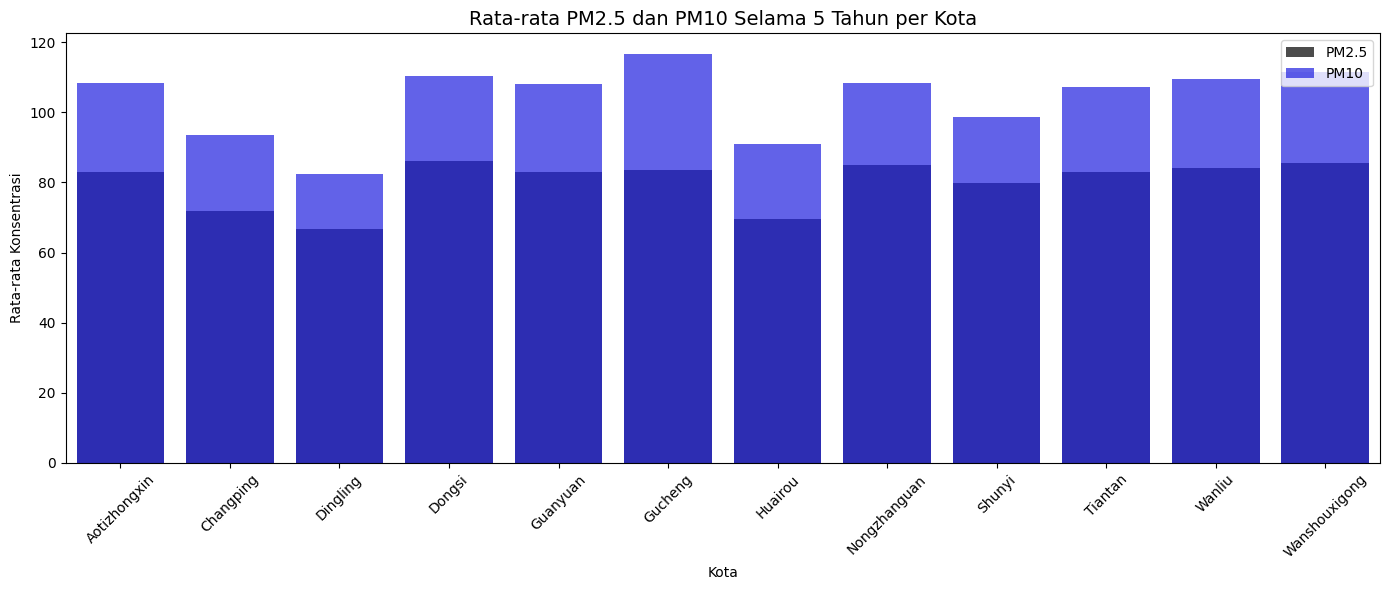

In [ ]:
# Visualisasi Polusi Rata-rata per Kota selama 5 tahun
plt.figure(figsize=(14, 6))
sns.barplot(data=pollution_overall_avg, x='station', y='PM2.5', color='black', alpha=0.7, label='PM2.5')
sns.barplot(data=pollution_overall_avg, x='station', y='PM10', color='blue', alpha=0.7, label='PM10')
plt.xticks(rotation=45)
plt.title("Rata-rata PM2.5 dan PM10 Selama 5 Tahun per Kota", fontsize=14)
plt.xlabel("Kota")
plt.ylabel("Rata-rata Konsentrasi")
plt.legend()
plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana perbedaan pola polusi udara (musiman atau harian) di antara kota-kota tersebut?

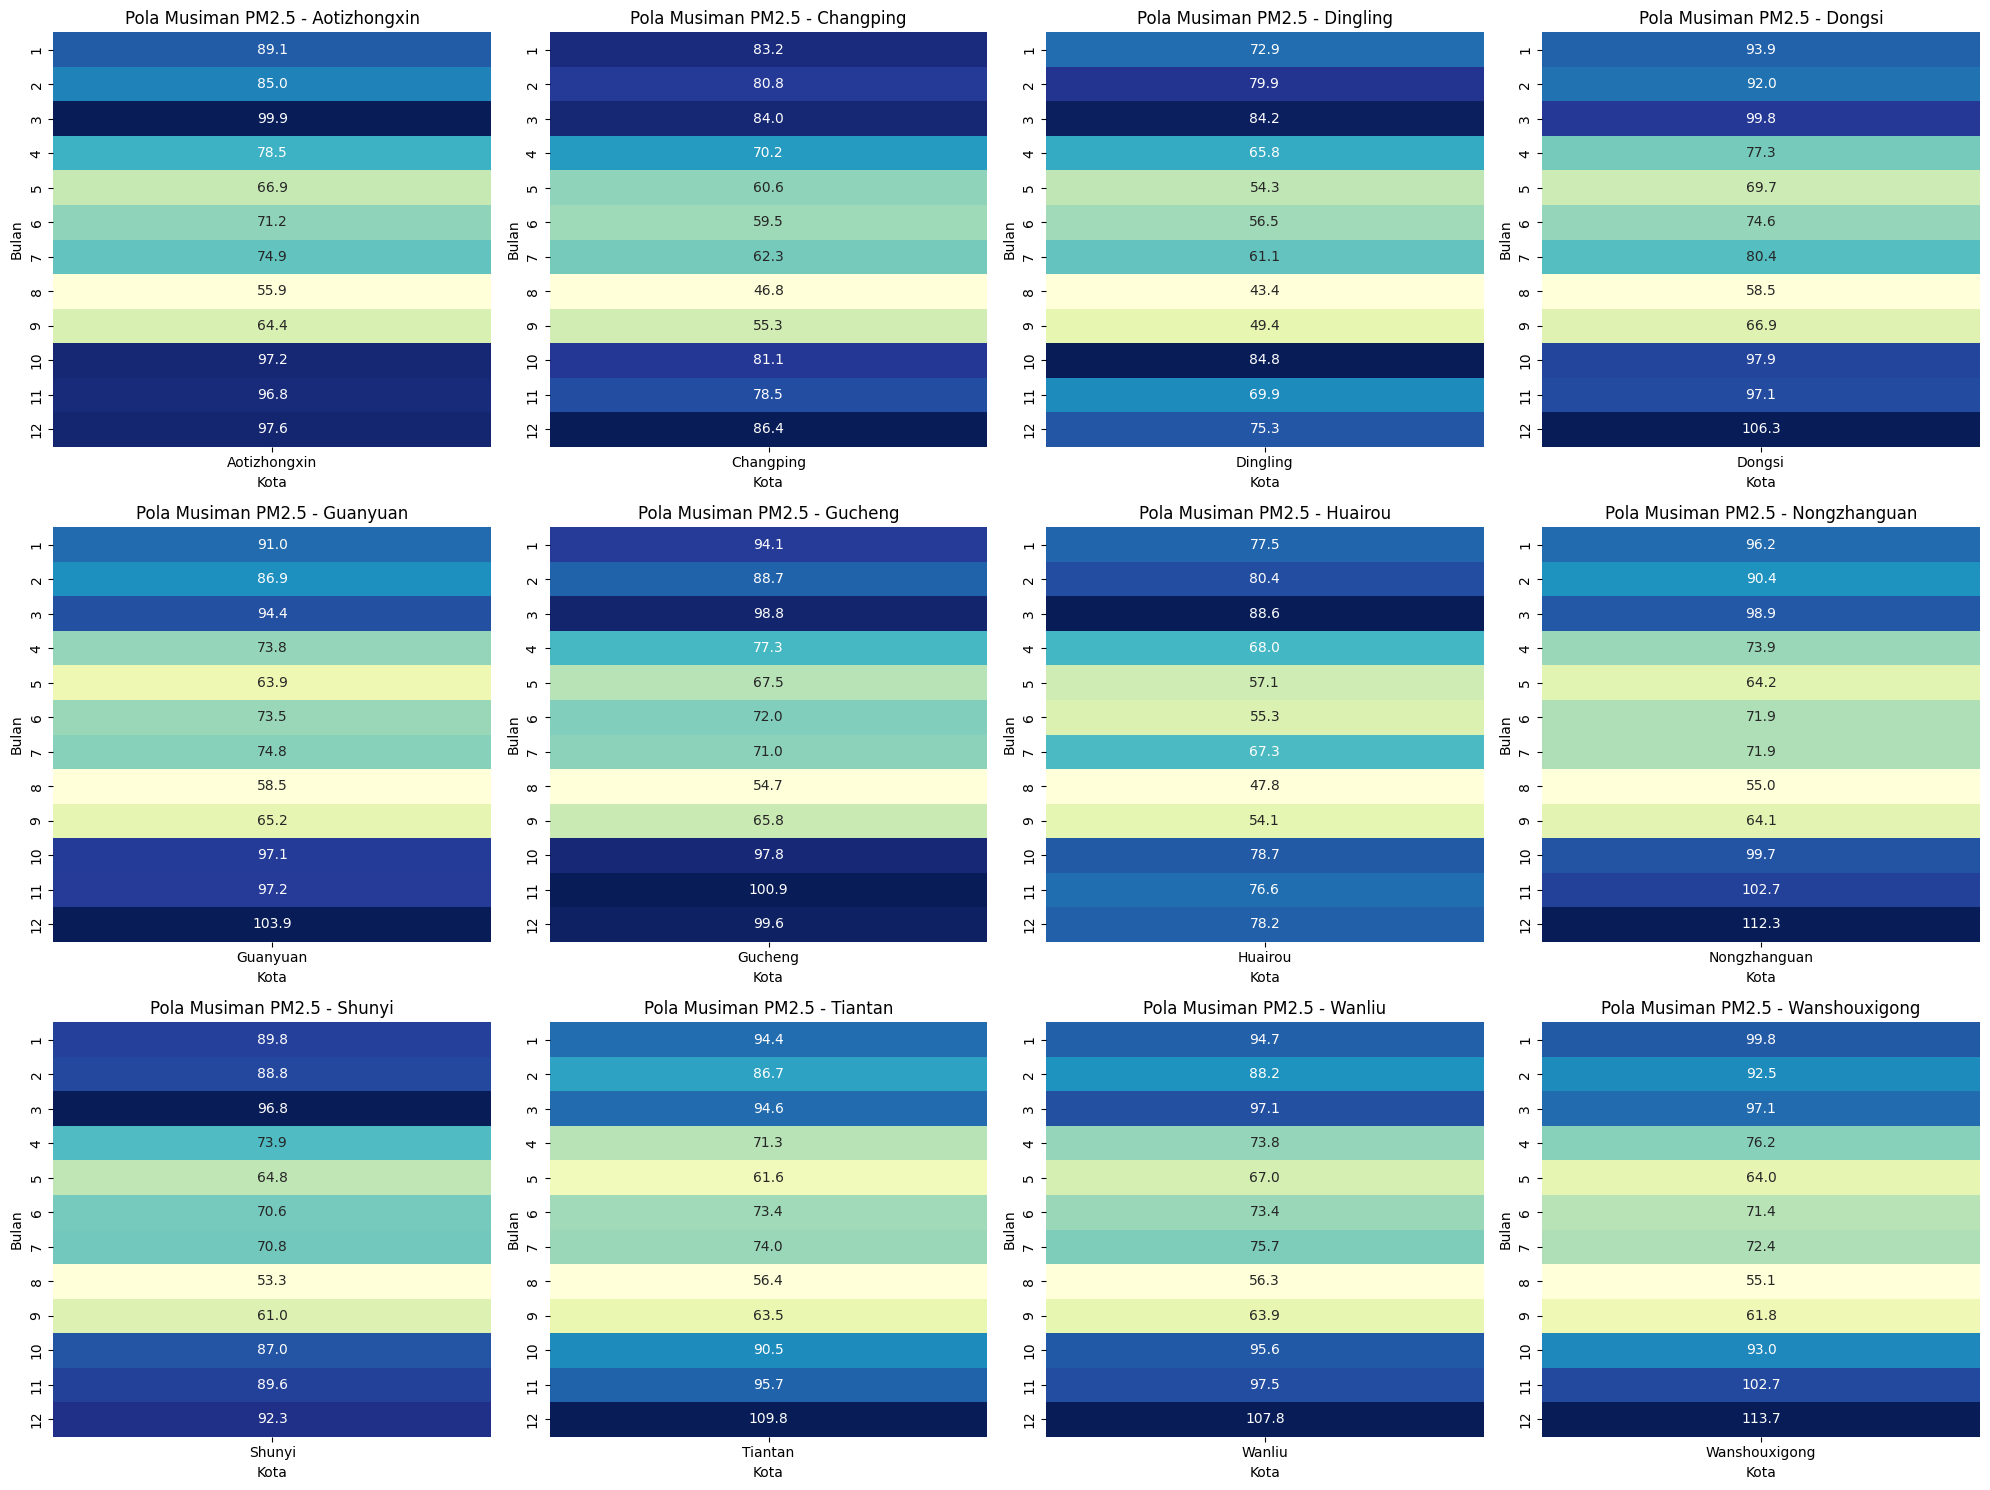

In [ ]:
# Rata-rata polusi PM2.5 per bulan untuk setiap kota
seasonal_data = combined_data.groupby(['station', 'month'])[['PM2.5']].mean().reset_index()

# Plot Heatmap untuk setiap kota
stations = combined_data['station'].unique()
plt.figure(figsize=(20, 15))
for i, station in enumerate(stations, 1):
    plt.subplot(3, 4, i)
    station_data = seasonal_data[seasonal_data['station'] == station].pivot(index='month', columns='station', values='PM2.5')
    sns.heatmap(station_data, annot=True, fmt=".1f", cmap="YlGnBu", cbar=False)
    plt.title(f"Pola Musiman PM2.5 - {station}", fontsize=12)
    plt.xlabel("Kota")
    plt.ylabel("Bulan")
plt.tight_layout()
plt.show()

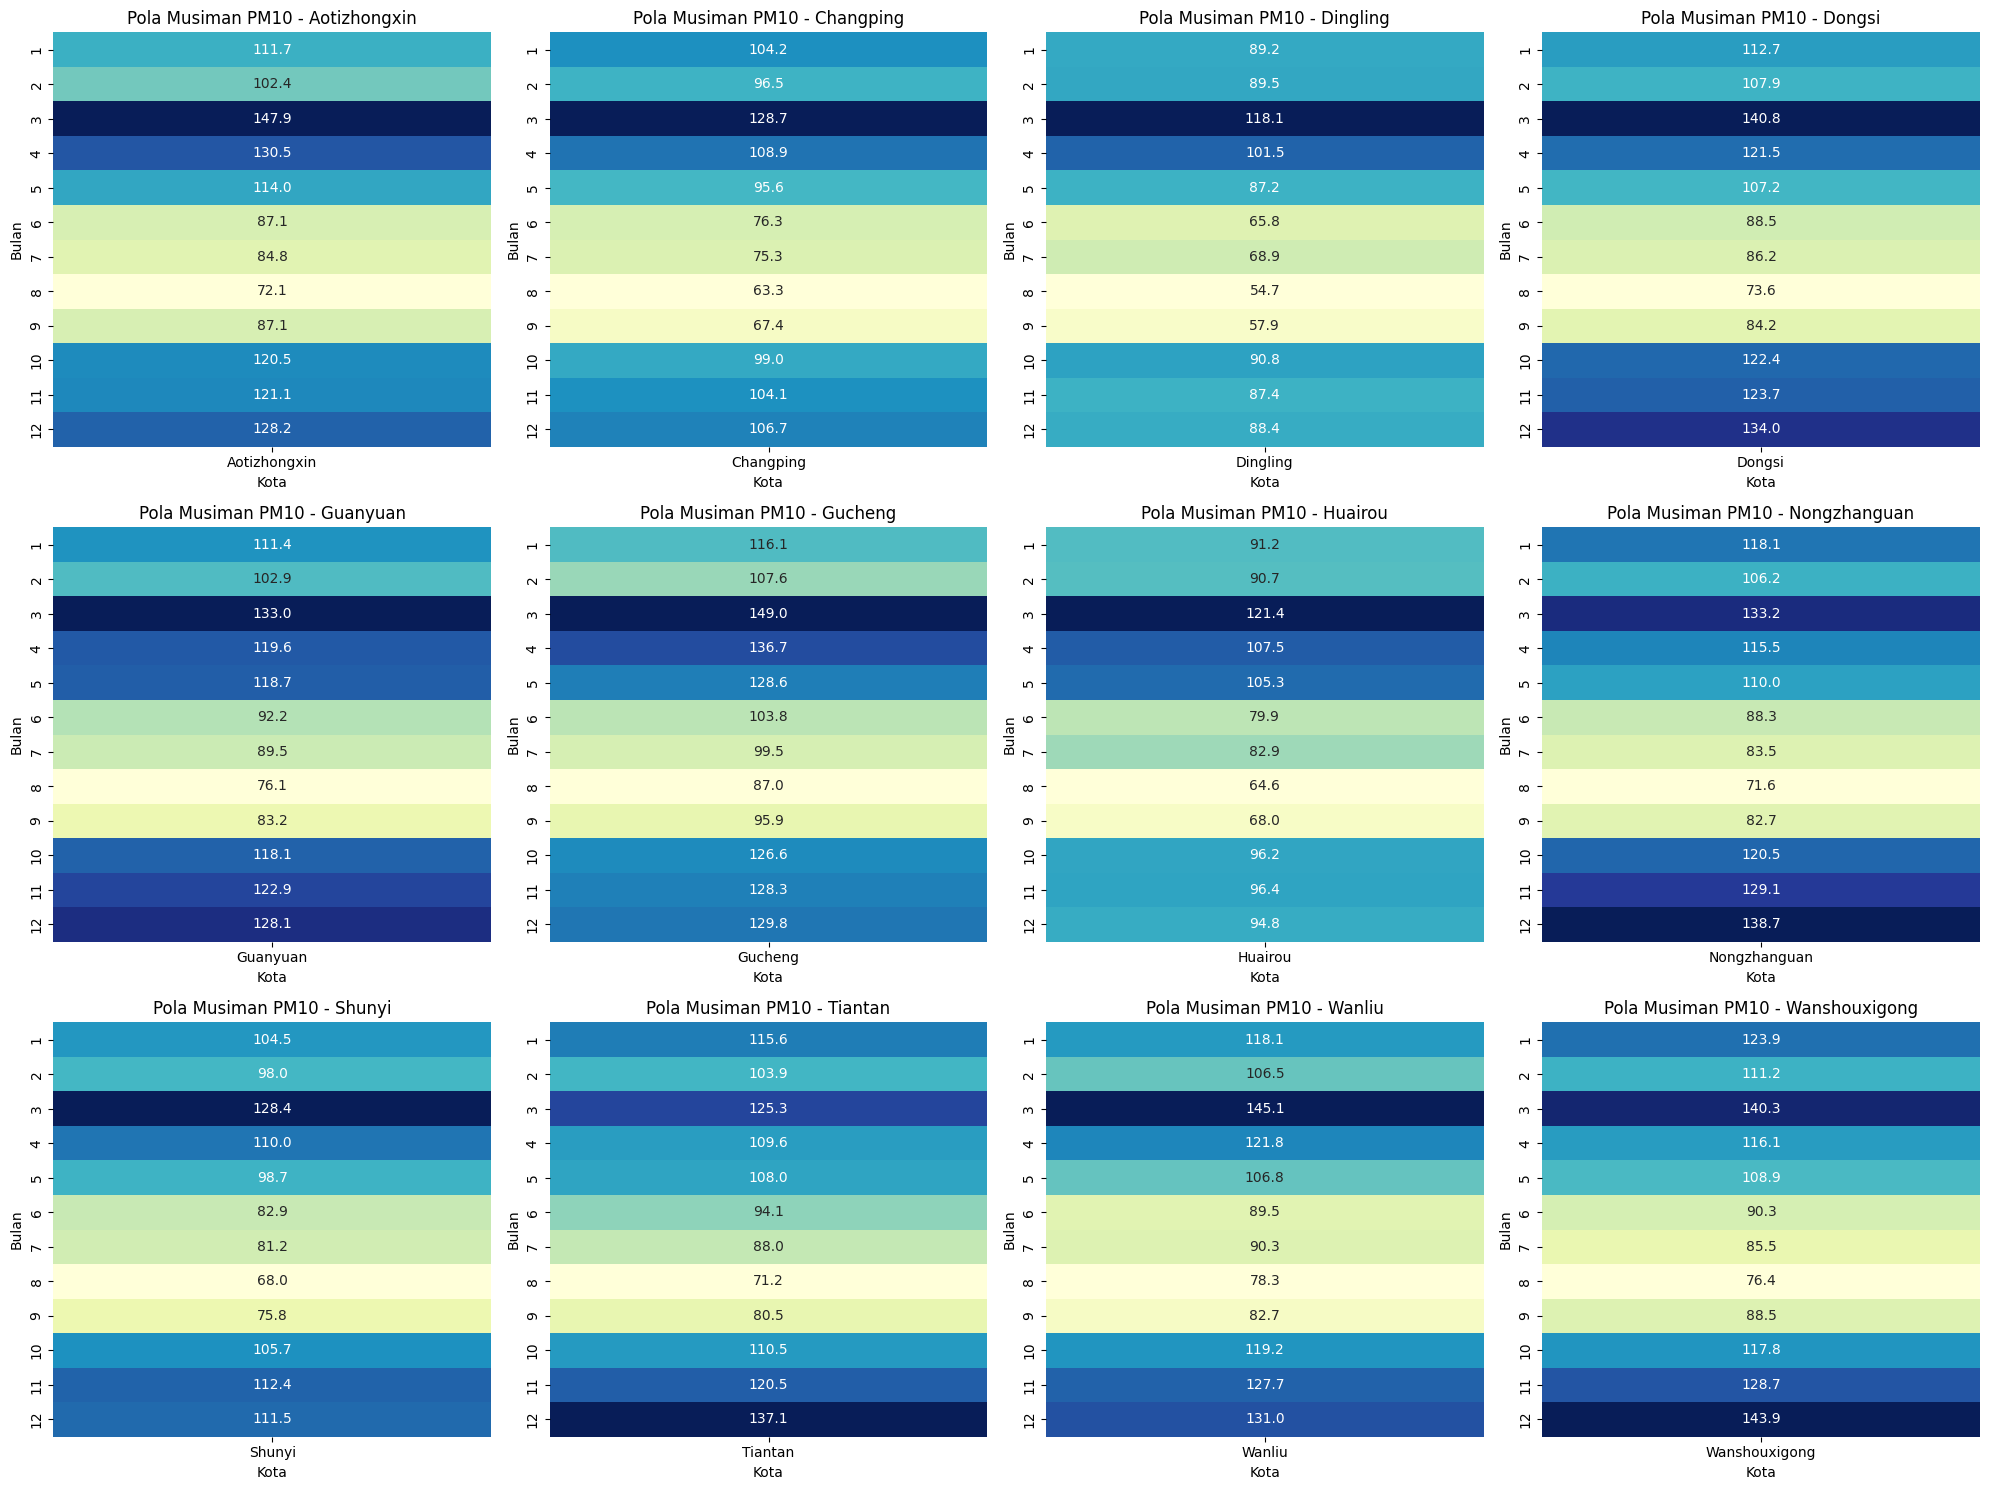

In [ ]:
# Rata-rata polusi PM10 per bulan untuk setiap kota
seasonal_data = combined_data.groupby(['station', 'month'])[['PM10']].mean().reset_index()

# Plot Heatmap untuk setiap kota
stations = combined_data['station'].unique()
plt.figure(figsize=(20, 15))
for i, station in enumerate(stations, 1):
    plt.subplot(3, 4, i)
    station_data = seasonal_data[seasonal_data['station'] == station].pivot(index='month', columns='station', values='PM10')
    sns.heatmap(station_data, annot=True, fmt=".1f", cmap="YlGnBu", cbar=False)
    plt.title(f"Pola Musiman PM10 - {station}", fontsize=12)
    plt.xlabel("Kota")
    plt.ylabel("Bulan")
plt.tight_layout()
plt.show()

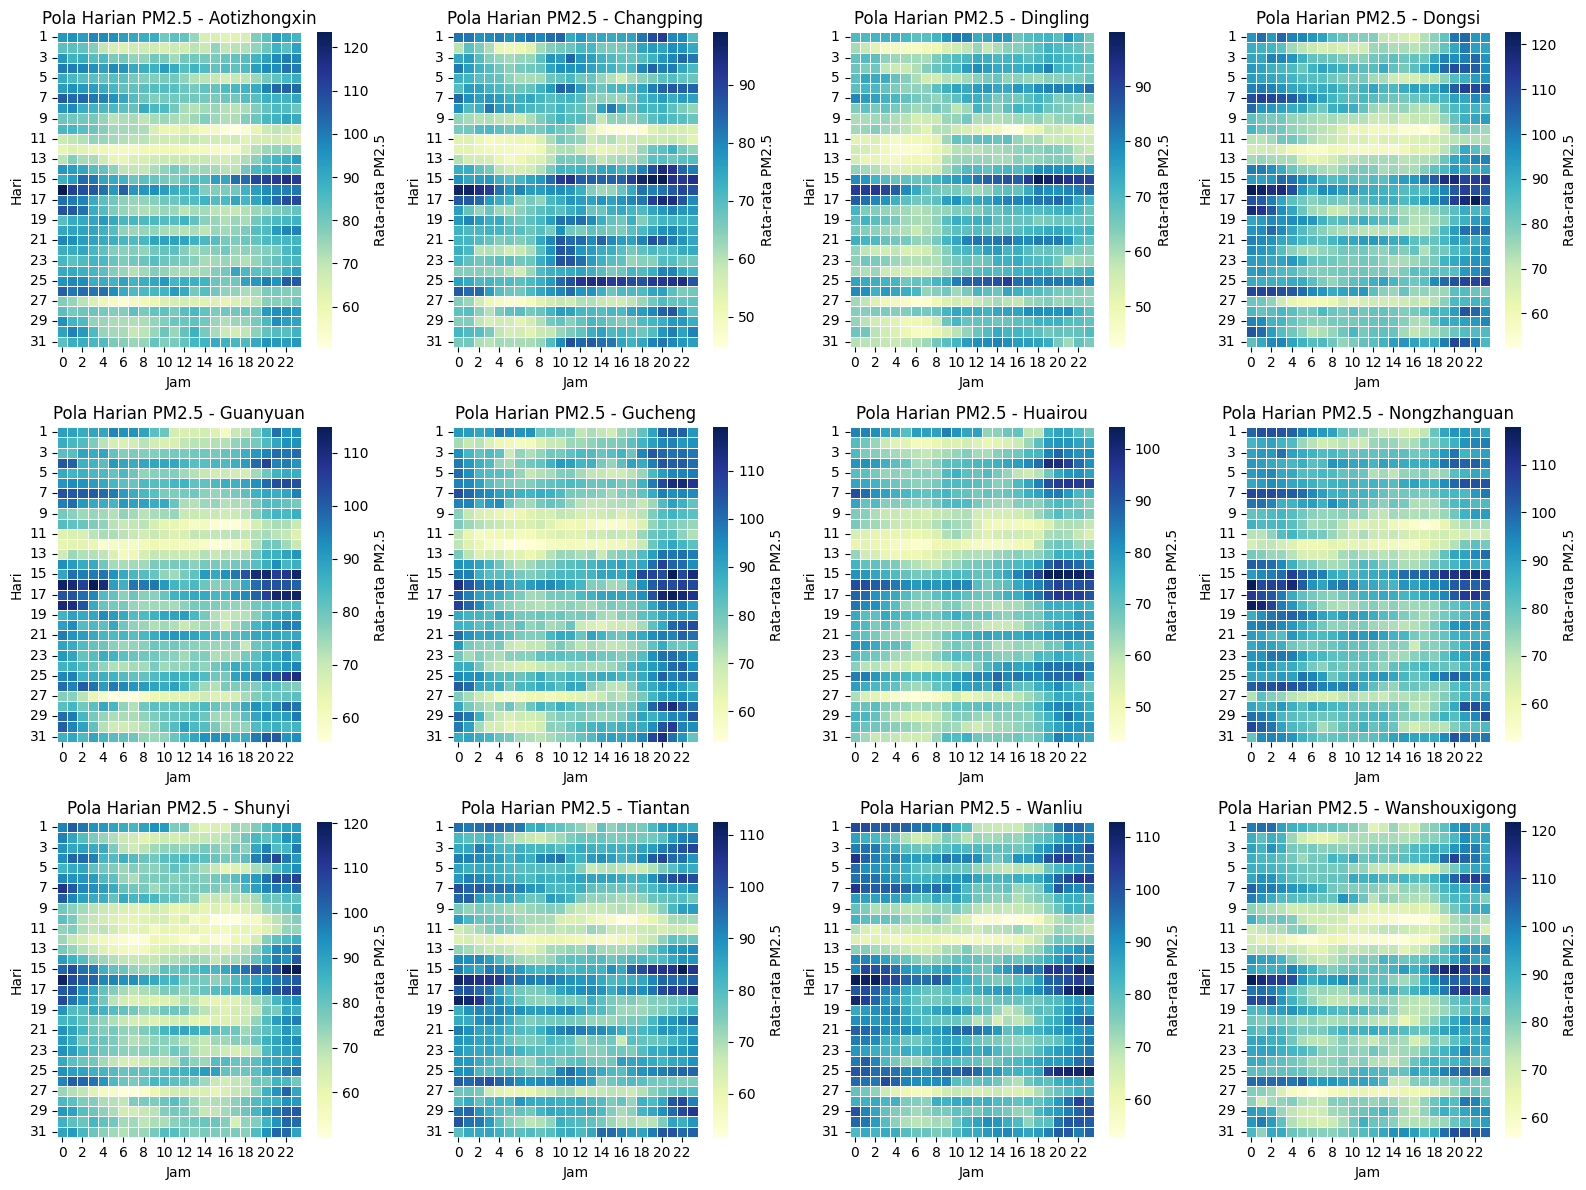

In [ ]:
#Rata -rata polusi harian untuk setiap kota selama 5 tahun terakhir

# Daftar kota
stations = combined_data['station'].unique()

# Menyiapkan figure dengan subplot sesuai dengan jumlah kota (12 kota)
plt.figure(figsize=(16, 12))

# Loop untuk membuat heatmap per kota
for i, station in enumerate(stations, 1):
    # Membatasi data untuk setiap kota
    station_data = combined_data[combined_data['station'] == station] # Filter combined_data

    # Membuat pivot table untuk heatmap (rata-rata PM2.5 per hari dan jam)
    heatmap_data = station_data.pivot_table(index='day', columns='hour', values='PM2.5', aggfunc='mean') # Now 'day' and 'hour' should be available

    # Membuat subplot untuk setiap kota
    plt.subplot(3, 4, i)  # 3 baris, 4 kolom (untuk 12 kota)
    sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False, fmt=".1f", cbar_kws={'label': 'Rata-rata PM2.5'}, linewidths=0.5)
    plt.title(f'Pola Harian PM2.5 - {station}', fontsize=12)
    plt.xlabel('Jam')
    plt.ylabel('Hari')

# Menambahkan layout agar subplots tidak saling tumpang tindih
plt.tight_layout()
plt.show()


### Pertanyaan 3: Apakah pola hubungan antara faktor cuaca (suhu, tekanan udara, hujan, dll.) dan tingkat polusi serupa di semua kota?

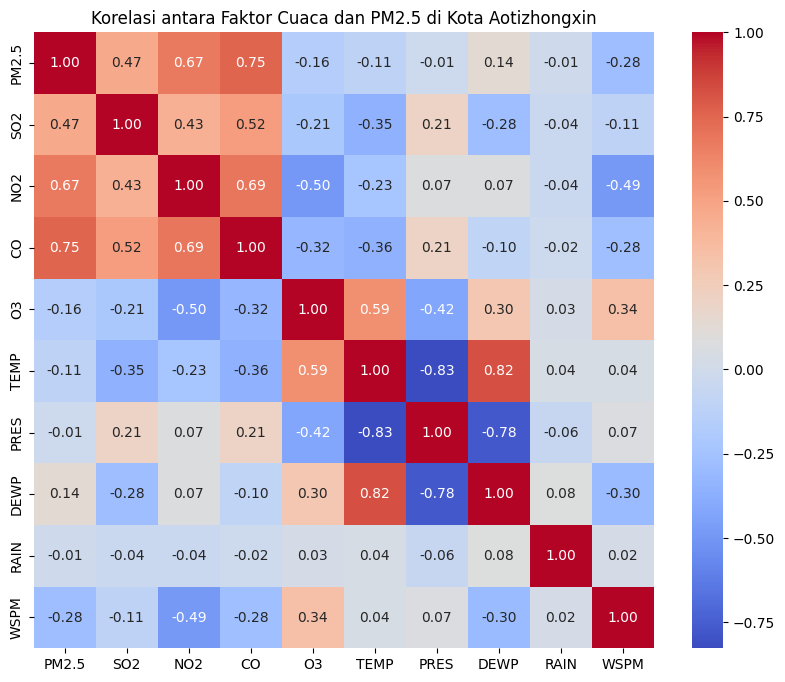

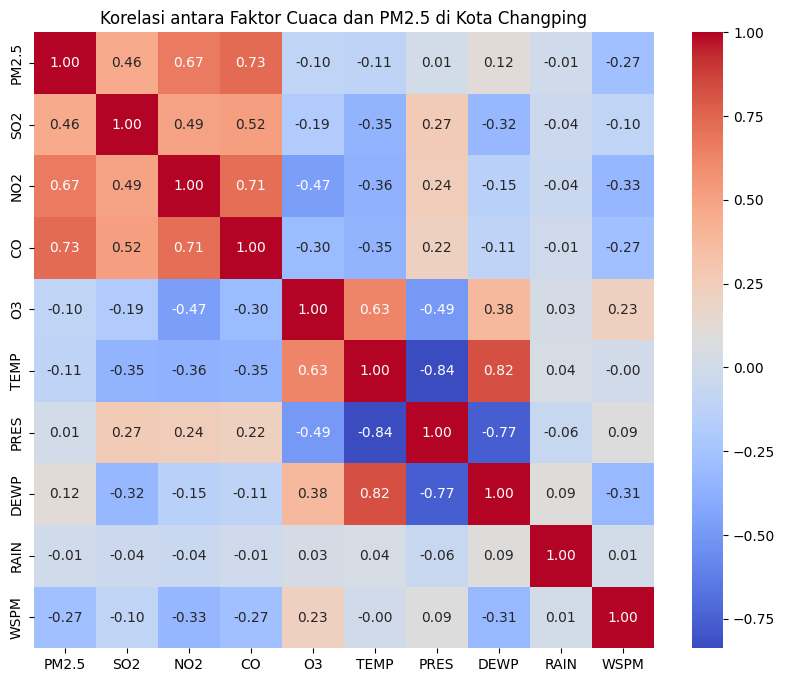

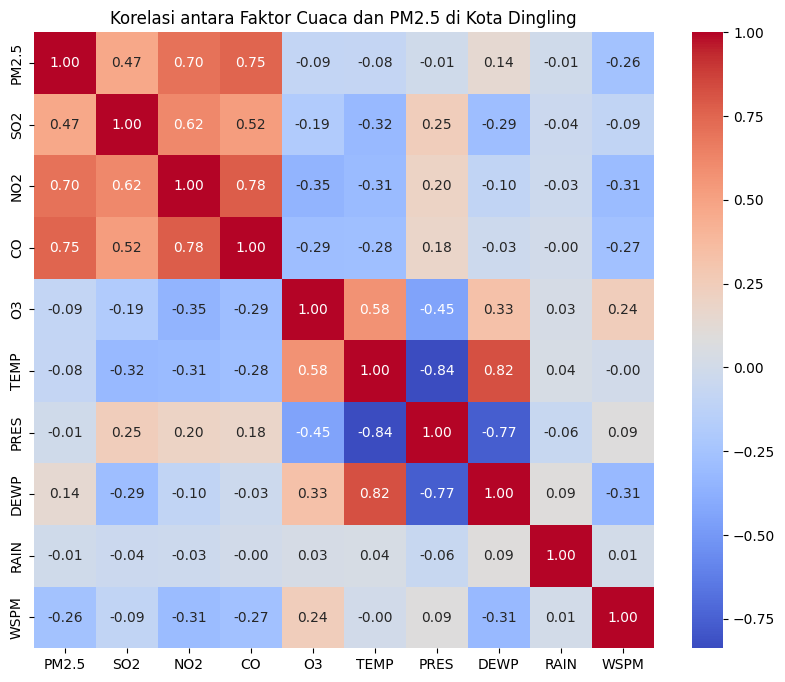

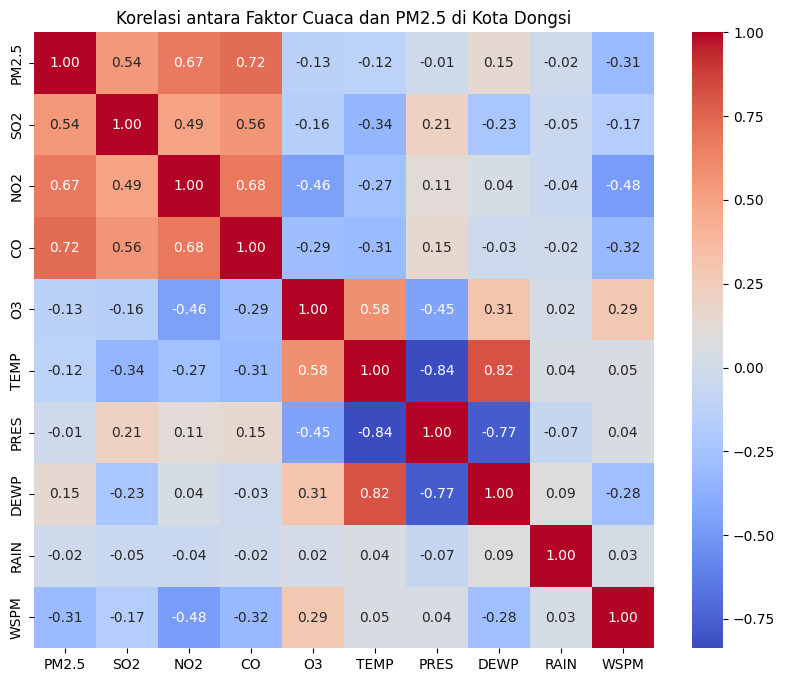

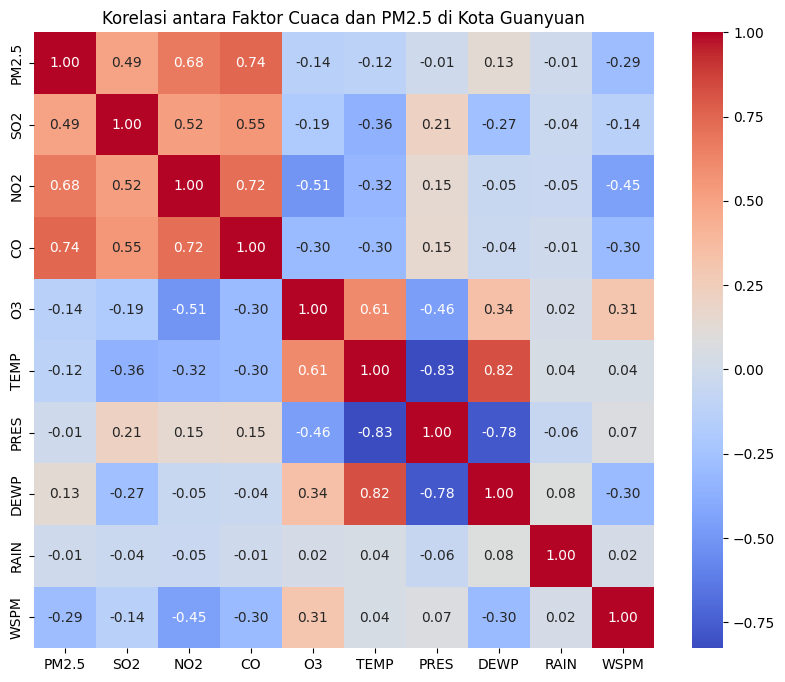

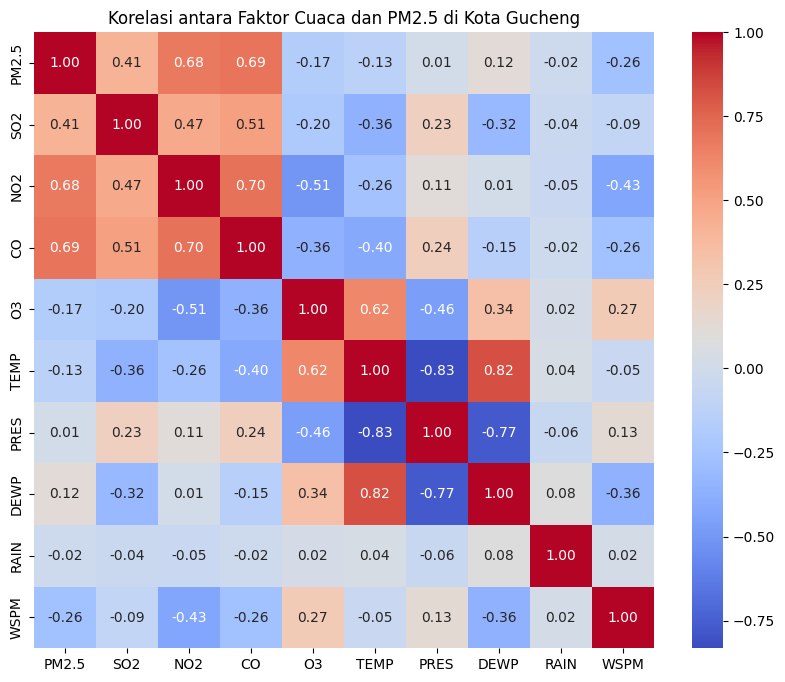

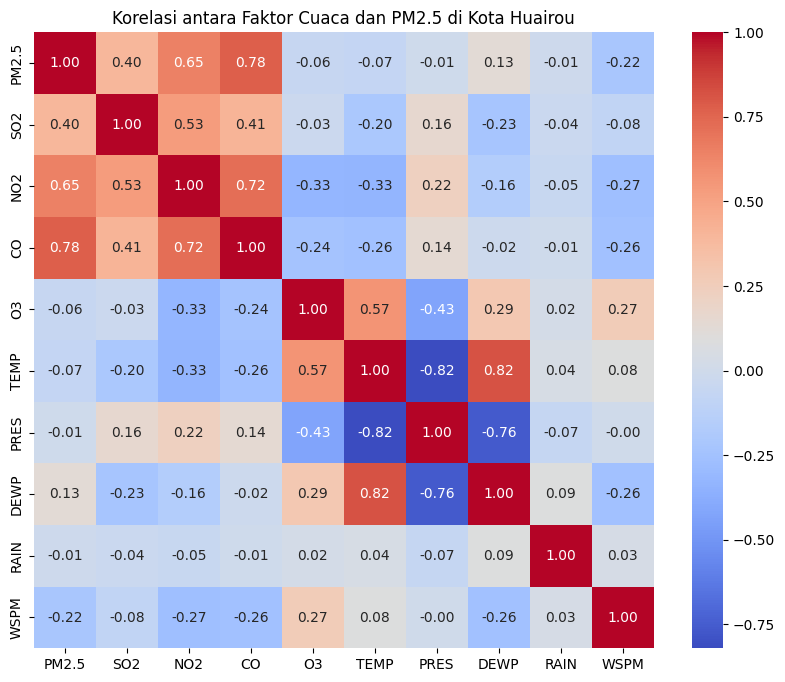

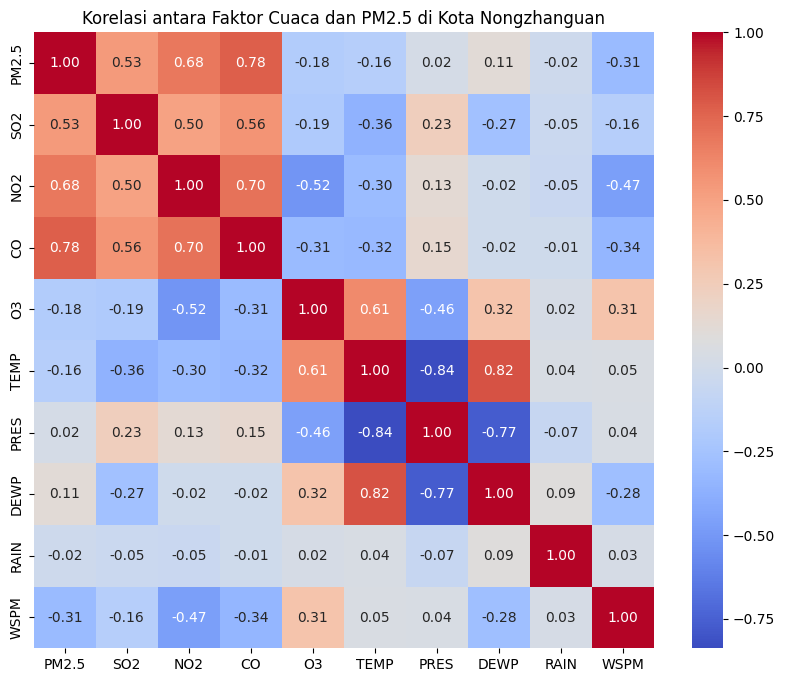

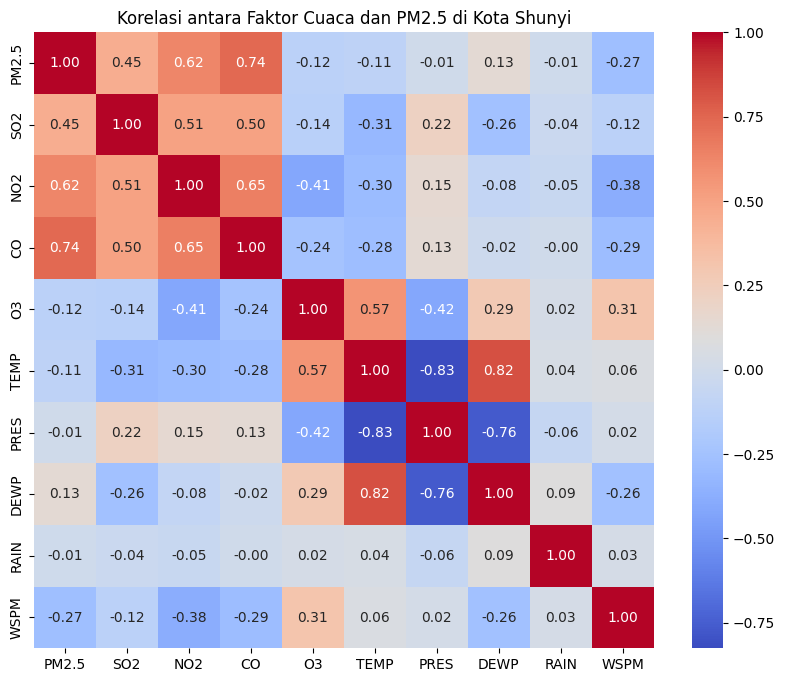

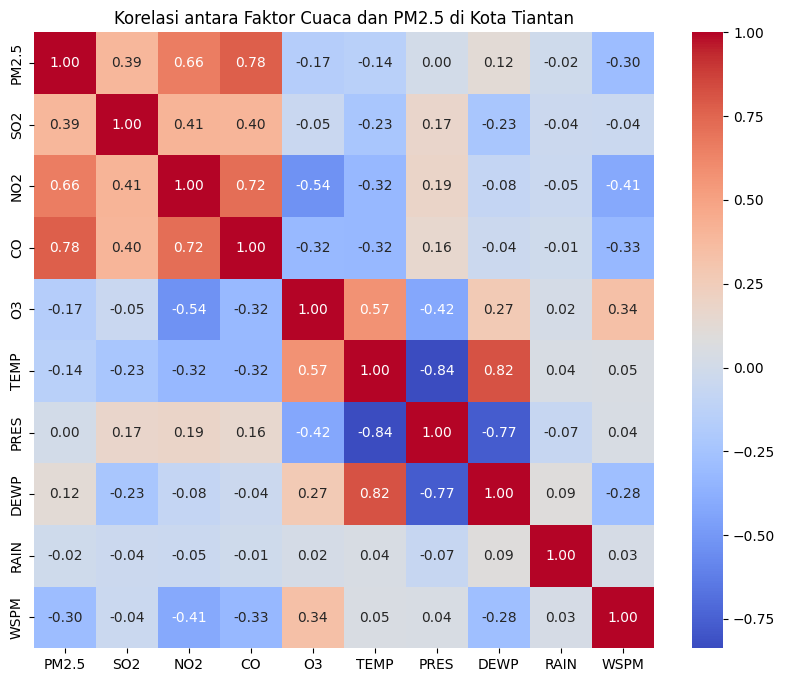

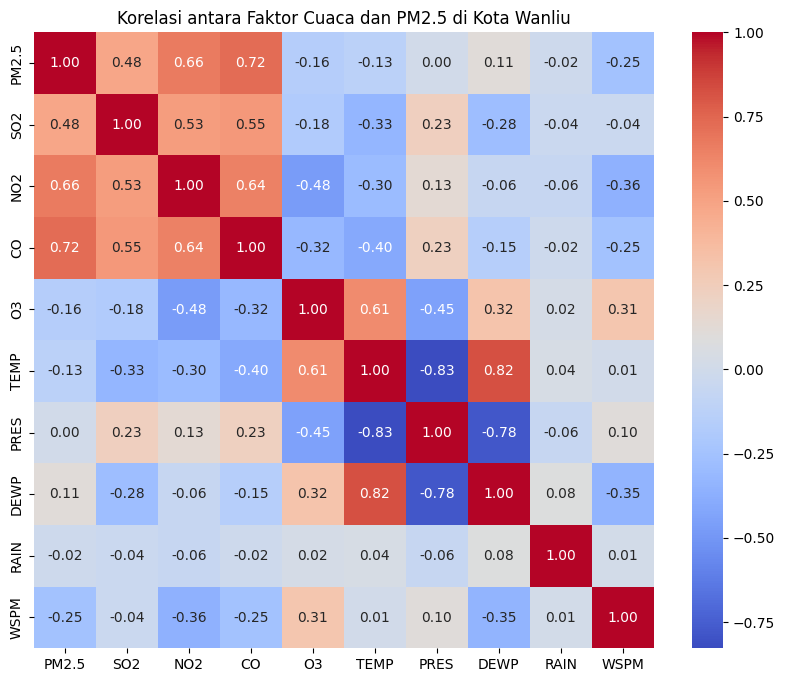

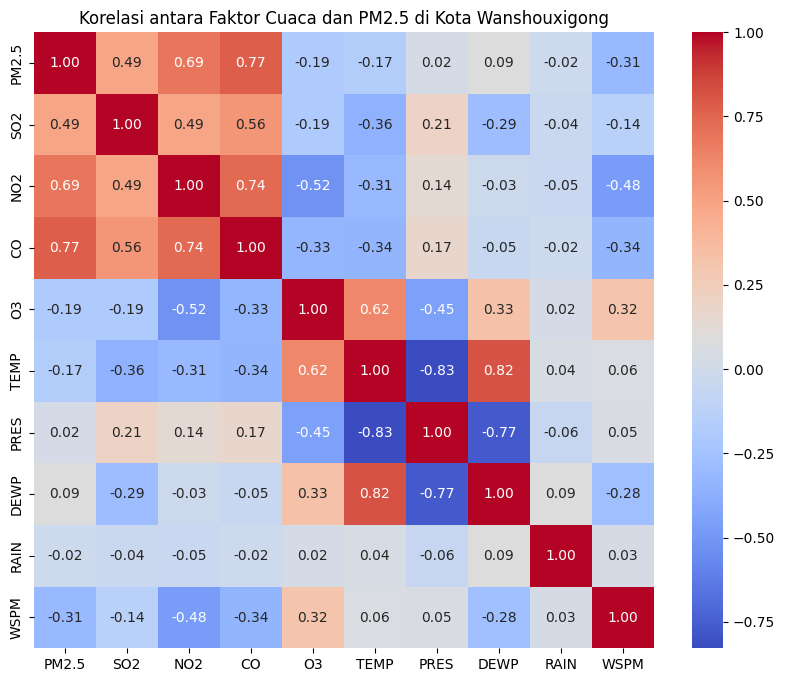

In [ ]:
# daftar nama kota
kota_korelasi = combined_data['station'].unique()

# Loop untuk menghitung dan memvisualisasikan korelasi untuk setiap kota
for city in kota_korelasi:
    # Filter data berdasarkan kota
    city_data = combined_data[combined_data['station'] == city]

    # memilih kolom yang relevan untuk analisis korelasi
    columns_of_interest = ["PM2.5", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
    city_data = city_data[columns_of_interest]

    # Hitung matriks korelasi
    correlation_matrix = city_data.corr()

    # Visualisasi matriks korelasi menggunakan heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(f"Korelasi antara Faktor Cuaca dan PM2.5 di Kota {city}")
    plt.show()

**Insight:**

- Analisis terhadap korelasi antara faktor cuaca dan konsentrasi PM2.5 di berbagai kota mengungkapkan wawasan yang penting. Secara konsisten, PM2.5 di seluruh kota menunjukkan korelasi positif yang kuat dengan nitrogen dioksida (NO2) dengan nilai korelasi 0,62-0,70 dan karbon monoksida (CO) dengan nilai korelasi 0,69-0,78. Hal ini mengindikasikan bahwa emisi dari sumber-sumber seperti kendaraan bermotor dan aktivitas industri menjadi kontributor utama terhadap tingginya kadar PM2.5 di masing-masing wilayah perkotaan.

Di sisi lain, PM2.5 juga memiliki korelasi negatif yang kuat dengan suhu (-0,24 hingga -0,36) dan tekanan udara (-0,78 hingga -0,84) di semua kota yang dianalisis. Temuan ini mengungkapkan bahwa kondisi cuaca yang lebih hangat dan kering dapat membantu menurunkan konsentrasi PM2.5 melalui proses dispersi dan pembentukan partikulat yang lebih baik. Namun, pengaruh faktor cuaca lainnya, seperti curah hujan dan kecepatan angin, relatif lemah dibandingkan dengan faktor lokal seperti emisi dan meteorologi.

## Analisis Lanjutan (Opsional)

## Conclusion

**- Conclution pertanyaan 1**

**Tingkat Polusi Tahunan Tertinggi dan Terendah**

- PM2.5: Kota Dongsi memiliki tingkat PM2.5 tertinggi, sementara Dingling memiliki tingkat terendah.
- PM10: Kota Gucheng memiliki tingkat PM10 tertinggi, sedangkan Dingling kembali menjadi kota dengan tingkat terendah.
- Kesimpulan: Terdapat perbedaan yang signifikan dalam tingkat polusi antara kota-kota yang dianalisis, dengan beberapa kota secara konsisten menunjukkan tingkat polusi yang lebih tinggi dibandingkan yang lainnya.

**- Conclution pertanyaan 2**
**Fluktuasi Bulanan dan Pola Musiman**

- Musim Dingin: Konsentrasi PM2.5 dan PM10 cenderung lebih tinggi pada bulan Desember-Februari, terutama di kota-kota seperti Nongzhanguan, Dongsi, dan Wanshouxigong.
-  Hal ini kemungkinan terkait dengan peningkatan penggunaan pemanas berbahan bakar fosil.
- Musim Panas: Konsentrasi PM2.5 dan PM10 cenderung menurun selama bulan Juni-Agustus.
- Kesimpulan: Terdapat pola musiman yang jelas pada konsentrasi polutan, dengan musim dingin cenderung memiliki tingkat polusi yang lebih tinggi dibandingkan musim panas.


**- Conclution pertanyaan 3 **
**Korelasi antara Faktor Cuaca dan Konsentrasi PM2.5**

- Korelasi Positif: PM2.5 memiliki korelasi positif yang kuat dengan NO2 dan CO, mengindikasikan bahwa emisi dari kendaraan bermotor dan industri menjadi kontributor utama polusi.
- Korelasi Negatif: PM2.5 memiliki korelasi negatif dengan suhu dan tekanan udara, menunjukkan bahwa kondisi cuaca yang lebih hangat dan kering dapat membantu mengurangi polusi.
- Kesimpulan: Faktor cuaca seperti suhu dan tekanan udara memiliki pengaruh signifikan terhadap konsentrasi PM2.5, namun emisi lokal tetap menjadi faktor dominan.
